# **Installs**

In [ ]:
!pip install tensorflow-datasets==4.8 --quiet
!pip install tensorflow==2.15.0 --quiet #15 13
!pip install tf_keras==2.15.0 --quiet
!pip install tensorflow-text==2.15.0 --quiet #15
!pip install transformers==4.17 --quiet
!pip install pydot --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.0 MB/s eta 0:00:00


## **Imports**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Embedding, Input, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import tensorflow_datasets as tfds



import sklearn as sk
from sklearn.metrics import classification_report
import os
import nltk
from nltk.data import find

import matplotlib.pyplot as plt

import re

In [ ]:
from transformers import BertTokenizer, TFBertModel

from transformers import logging
logging.set_verbosity_error()

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
import pandas as pd

# **Data Load**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/capstone_modeling/data'

In [ ]:
train_df = pd.read_csv(f"{DATA_PATH}/train_dataset_w59types.csv")

unique_counts = train_df.apply(lambda x: x.nunique())
print("\nUnique Value Counts:")
print(unique_counts)

duplicate_projects = train_df[train_df.duplicated('project_name', keep=False)]
duplicate_projects

type_df = train_df["type"]
type_counts = type_df.value_counts().reset_index()
type_counts.columns = ["type", 'count']

type_counts


Unique Value Counts:
project_id                                7234
project_name                              7168
methodologyorprotocol                      292
fully_harmonized_methodologyorprotocol     277
region                                       8
voluntary_registry                           4
type_from_registry                          99
project_developer                         2512
arborwa_project                              3
type                                        59
rule-based_type_mapping_first               50
dtype: int64


,type,count
0,Cookstoves,1147
1,Wind,811
2,Improved Forest Management,605
3,Hydropower,423
4,Afforestation/Reforestation,378
5,Manure Methane Digester,359
6,Clean Water,330
7,Landfill Methane,306
8,Solar - Centralized,258
9,Rice Emission Reductions,234


In [ ]:
'''
# Projects with types lower than 5 counts
type_counts = train_df["type"].value_counts()

# Identify the types with fewer than 5 counts
types_to_drop = type_counts[type_counts < 2].index
print(types_to_drop.shape)
# Drop the records with these types from train_df
train_df_new = train_df[~train_df["type"].isin(types_to_drop)]
print(train_df_new.shape)
'''

(9,)
(7260, 45)


In [ ]:
X_train_df = train_df.drop(columns=['type'])
Y_train_df = train_df['type']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val  = train_test_split(X_train_df,Y_train_df, test_size=0.1, stratify =Y_train_df,  random_state=42)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape )

(6510, 10) (724, 10) (6510,) (724,)


In [ ]:
len(Y_train.unique())

59

In [ ]:
train_proj_ids = list(X_train.project_id)

In [ ]:
val_proj_ids = list(X_val.project_id)

In [ ]:
data_preprocessed = pd.read_csv(f'{DATA_PATH}/projects_table_rules_final_ml_roshni.csv')

In [ ]:
model_name =  'bert-base-cased'

bert_tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name, output_hidden_states = True)

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

In [ ]:
data_preprocessed.head()

,project_id,project_name,voluntary_registry,voluntary_status,reduction_removal,project_type_from_the_registry,region,country,state,project_site_location,...,arb_project_type,version_string,arb_harmonized_methodology,car_harmonized_methodology,methodology_protocol,harmonized_methodology_protocol,fully_harmonized_methodology_protocol,rule_based_type_mapping_list,rule_based_type_mapping_first,vrod_v11_type
0,ACR1002,Doyon Ts'oo,ACR,Listed,NaN,Forest Carbon,NaN,US,ALASKA,Southeast and Northwest Interior Alaska,...,NaN,NaN,NaN,NaN,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,ACR Improved Forest Management (IFM) on Non-Fe...,"[(81, 'Improved Forest Management')]",Improved Forest Management,Improved Forest Management
1,ACR1006,Challenge Tree Farm IFM Project,ACR,Listed,NaN,Forest Carbon,NaN,US,CALIFORNIA,Yuba and Butte County,...,NaN,NaN,NaN,NaN,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,ACR Improved Forest Management (IFM) on Non-Fe...,"[(81, 'Improved Forest Management')]",Improved Forest Management,Improved Forest Management
2,ACR1007,A-Gas 3-2023B,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,OHIO,Bowling Green,...,NaN,NaN,NaN,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,"[(58, 'Ozone Depleting Substances Recovery & D...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction
3,ACR1008,Advanced Refrigeration - ARS2022004,ACR,Listed,NaN,Industrial Process Emissions,NaN,US,MISSOURI,"1181 Gannon plaza, Festus, MO",...,NaN,NaN,NaN,NaN,Advanced Refrigeration Systems,ACR Advanced Refrigeration Systems,ACR Advanced Refrigeration Systems,"[(41, 'Advanced Refrigerants')]",Advanced Refrigerants,Advanced Refrigerants
4,ACR101,AFOVERT Energy,ACR,Canceled,NaN,Fuel Switching,NaN,ML,Niono District,Niono,...,NaN,NaN,NaN,NaN,AMS-I.E.,AMS-I.E. Switch from non-renewable biomass for...,AMS-I.E. Switch from non-renewable biomass for...,[],NaN,Bundled Energy Efficiency


In [ ]:
data_preprocessed_no_small_classes = data_preprocessed[data_preprocessed.project_id.isin(train_proj_ids + val_proj_ids)]

In [ ]:
len(data_preprocessed_no_small_classes)

7234

In [ ]:
target_names = list(np.unique(data_preprocessed_no_small_classes.sort_values(['vrod_v11_type'])['vrod_v11_type']))
target_labels = {target_names[i]:i for i in range(len(target_names))}

def generate_integer_labels(df):
  df['type_label'] = df['vrod_v11_type'].map(target_labels)
  return df

data_preprocessed_no_small_classes = generate_integer_labels(data_preprocessed_no_small_classes)

<ipython-input-23-29d50dfe351b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_label'] = df['vrod_v11_type'].map(target_labels)


In [ ]:
data_train = data_preprocessed_no_small_classes[data_preprocessed_no_small_classes.project_id.isin(train_proj_ids)]

In [ ]:
data_valid = data_preprocessed_no_small_classes[data_preprocessed_no_small_classes.project_id.isin(val_proj_ids)]

In [ ]:
MAX_SEQUENCE_LENGTH = 124 # Using 124 for max sequence length in our data.

In [ ]:
data_train

,project_id,project_name,voluntary_registry,voluntary_status,reduction_removal,project_type_from_the_registry,region,country,state,project_site_location,...,version_string,arb_harmonized_methodology,car_harmonized_methodology,methodology_protocol,harmonized_methodology_protocol,fully_harmonized_methodology_protocol,rule_based_type_mapping_list,rule_based_type_mapping_first,vrod_v11_type,type_label
0,ACR1002,Doyon Ts'oo,ACR,Listed,NaN,Forest Carbon,NaN,US,ALASKA,Southeast and Northwest Interior Alaska,...,NaN,NaN,NaN,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,ACR Improved Forest Management (IFM) on Non-Fe...,"[(81, 'Improved Forest Management')]",Improved Forest Management,Improved Forest Management,24
1,ACR1006,Challenge Tree Farm IFM Project,ACR,Listed,NaN,Forest Carbon,NaN,US,CALIFORNIA,Yuba and Butte County,...,NaN,NaN,NaN,Improved Forest Management (IFM) on Non-Federa...,ACR Improved Forest Management (IFM) on Non-Fe...,ACR Improved Forest Management (IFM) on Non-Fe...,"[(81, 'Improved Forest Management')]",Improved Forest Management,Improved Forest Management,24
3,ACR1008,Advanced Refrigeration - ARS2022004,ACR,Listed,NaN,Industrial Process Emissions,NaN,US,MISSOURI,"1181 Gannon plaza, Festus, MO",...,NaN,NaN,NaN,Advanced Refrigeration Systems,ACR Advanced Refrigeration Systems,ACR Advanced Refrigeration Systems,"[(41, 'Advanced Refrigerants')]",Advanced Refrigerants,Advanced Refrigerants,0
4,ACR101,AFOVERT Energy,ACR,Canceled,NaN,Fuel Switching,NaN,ML,Niono District,Niono,...,NaN,NaN,NaN,AMS-I.E.,AMS-I.E. Switch from non-renewable biomass for...,AMS-I.E. Switch from non-renewable biomass for...,[],NaN,Bundled Energy Efficiency,8
5,ACR1013,Tradewater ODS 54,ACR,NaN,NaN,Ozone Depleting Substances,NaN,US,OHIO,Bowling Green,...,NaN,NaN,NaN,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,ARB Compliance Offset Protocol: Destruction of...,"[(58, 'Ozone Depleting Substances Recovery & D...",Ozone Depleting Substances Recovery & Destruction,Ozone Depleting Substances Recovery & Destruction,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,VCS993,"TIST Program in Uganda, VCS 005",VCS,Registered,NaN,Agriculture Forestry and Other Land Use,Africa,Uganda,NaN,NaN,...,NaN,NaN,NaN,AR-AMS0001,AR-AMS0001 Simplified baseline and monitoring ...,AR-AMS0001 Simplified baseline and monitoring ...,"[(108, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,1
9079,VCS994,"TIST Program in India, VCS 001",VCS,Registered,NaN,Agriculture Forestry and Other Land Use,Asia,India,NaN,NaN,...,NaN,NaN,NaN,AR-AMS0001,AR-AMS0001 Simplified baseline and monitoring ...,AR-AMS0001 Simplified baseline and monitoring ...,"[(108, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,1
9080,VCS995,"TIST Program in Uganda, VCS 006",VCS,Registered,NaN,Agriculture Forestry and Other Land Use,Africa,Uganda,NaN,NaN,...,NaN,NaN,NaN,AR-AMS0001,AR-AMS0001 Simplified baseline and monitoring ...,AR-AMS0001 Simplified baseline and monitoring ...,"[(108, 'Afforestation/Reforestation')]",Afforestation/Reforestation,Afforestation/Reforestation,1
9082,VCS997,Xinjiang Kaiduhe River Chahan Wusu Hydropower ...,VCS,Late to verify,NaN,Energy industries (renewable/non-renewable sou...,Asia,China,NaN,NaN,...,NaN,NaN,NaN,ACM0002,ACM0002 Grid-connected electricity generation ...,ACM0002 Grid-connected electricity generation ...,"[(12, 'Hydropower')]",Hydropower,Hydropower,23


In [ ]:
data_train.value_counts('vrod_v11_type')

vrod_v11_type
Cookstoves                                           1032
Wind                                                  730
Improved Forest Management                            544
Hydropower                                            381
Afforestation/Reforestation                           340
Manure Methane Digester                               323
Clean Water                                           297
Landfill Methane                                      275
Solar - Centralized                                   228
Rice Emission Reductions                              213
Ozone Depleting Substances Recovery & Destruction     211
Biomass                                               200
REDD+                                                 196
Community Boreholes                                   186
Biodigesters                                          175
Sustainable Agriculture                               119
Bundled Energy Efficiency                             112


In [ ]:
# Undersampling most frequent classes
class_size = 800

res = data_train.groupby('vrod_v11_type').apply(lambda x: x.sample(n=min(class_size, len(x))))
res = res.reset_index(drop=True)
print(res['vrod_v11_type'].value_counts())

vrod_v11_type
Cookstoves                                           800
Wind                                                 730
Improved Forest Management                           544
Hydropower                                           381
Afforestation/Reforestation                          340
Manure Methane Digester                              323
Clean Water                                          297
Landfill Methane                                     275
Solar - Centralized                                  228
Rice Emission Reductions                             213
Ozone Depleting Substances Recovery & Destruction    211
Biomass                                              200
REDD+                                                196
Community Boreholes                                  186
Biodigesters                                         175
Sustainable Agriculture                              119
Bundled Energy Efficiency                            112
Mine Methane Capt

In [ ]:
# Undersampling lower frequency classes
lst = [res]
for class_index, group in res.groupby('vrod_v11_type'):
    lst.append(group.sample(class_size-len(group), replace=True))
res_new = pd.concat(lst)

In [ ]:
data_train = res_new

In [ ]:
def generate_input_text_col(df):
  cols = ['project_name',
          'fully_harmonized_methodology_protocol',
          'region',
          'voluntary_registry',
          'project_type_from_the_registry',
          'project_developer',
          'arborwaproject']
  df['input_text'] = df[cols].apply(lambda row: '. '.join(row.values.astype(str)), axis=1)
  return df

In [ ]:
data_train = generate_input_text_col(data_train)
data_valid = generate_input_text_col(data_valid)

<ipython-input-32-20974c6dbfac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['input_text'] = df[cols].apply(lambda row: '. '.join(row.values.astype(str)), axis=1)


In [ ]:
data_train.to_csv('/content/drive/MyDrive/capstone_modeling/data_train_oversampled_kh.csv')

In [ ]:
# Define a function to process and tokenize training data for re-use throughout experiments.
def process_data(df):

  texts = list(df.input_text)
  labels = np.array(df.type_label)
  encodings = bert_tokenizer(texts, truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors='tf')

  return texts, labels, encodings

In [ ]:
(train_texts, train_labels, train_encodings) = process_data(data_train)
(valid_texts, valid_labels, valid_encodings) = process_data(data_valid)

# **Model Construction**

In [ ]:
# Suppress missing gradients warnings
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [ ]:
# Bert Model creation
def create_model(max_sequence_length=MAX_SEQUENCE_LENGTH,
                 num_train_layers=3,
                 dropout=0.3,
                 num_classes=len(Y_train.unique()),
                 hidden_size=128,
                 learning_rate=0.00005):

    if num_train_layers == 0:
        # Freeze all layers of pre-trained BERT model
        bert_model.trainable = False

    elif num_train_layers == 12:
        # Train all layers of the BERT model
        bert_model.trainable = True

    else:
        # Restrict training to the num_train_layers outer transformer layers
        retrain_layers = []

        for retrain_layer_number in range(num_train_layers):

            layer_code = '_' + str(11 - retrain_layer_number)
            retrain_layers.append(layer_code)

        print('retrain layers: ', retrain_layers)

        for w in bert_model.weights:
            if not any([x in w.name for x in retrain_layers]):
                #print('freezing: ', w)
                w._trainable = False

    # Inputs
    input_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}

    bert_out = bert_model(bert_inputs)

    pooler_token = bert_out[1]

    # Emotion Classification: Linear Classification Layer
    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(pooler_token)

    hidden = tf.keras.layers.Dropout(dropout)(hidden)

    classification = tf.keras.layers.Dense(num_classes, activation='softmax',name='classification_layer')(hidden)

    # Model and compilation.
    model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=classification)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                      metrics='accuracy')

    return model

## **Model Summary**

In [ ]:
type_classification_model = create_model()

retrain layers:  ['_11', '_10', '_9']


In [ ]:
type_classification_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask_layer (Inpu  [(None, 124)]                0         []                            
 tLayer)                                                                                          
                                                                                                  
 input_ids_layer (InputLaye  [(None, 124)]                0         []                            
 r)                                                                                               
                                                                                                  
 token_type_ids_layer (Inpu  [(None, 124)]                0         []                            
 tLayer)                                                                                      

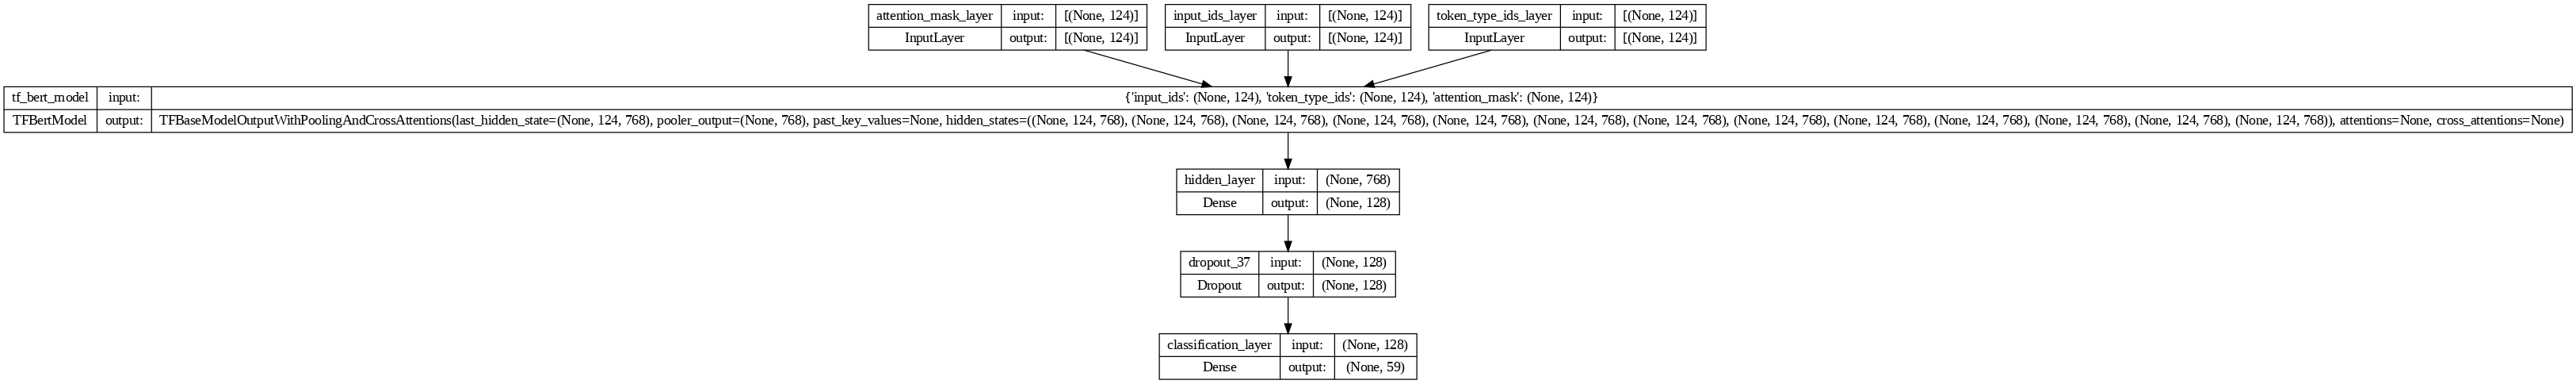

In [ ]:
keras.utils.plot_model(type_classification_model, show_shapes=True, dpi=90)

In [ ]:
model_history = type_classification_model.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
                                              train_labels,
                                              validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask], valid_labels),
                                              batch_size=24,
                                              epochs=2
                                              )

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1967/1967 [==============================] - 949s 481ms/step - loss: 0.7120 - accuracy: 0.8529 - val_loss: 0.2983 - val_accuracy: 0.9337
Epoch 2/2
1967/1967 [==============================] - 944s 480ms/step - loss: 0.0664 - accuracy: 0.9873 - val_loss: 0.3448 - val_accuracy: 0.9268


In [ ]:
preds = type_classification_model.predict([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask])
preds_classes = tf.argmax(preds, axis=-1)

23/23 [==============================] - 6s 261ms/step


In [ ]:
print(classification_report(valid_labels, preds_classes, labels = np.arange(0, len(target_names), 1), target_names = target_names))

                                                   precision    recall  f1-score   support

                            Advanced Refrigerants       1.00      1.00      1.00         3
                      Afforestation/Reforestation       0.97      0.97      0.97        38
                        Avoided Forest Conversion       1.00      1.00      1.00         1
                     Avoided Grassland Conversion       1.00      1.00      1.00         2
                                         Bicycles       1.00      1.00      1.00         1
                                     Biodigesters       1.00      0.95      0.97        19
                                          Biomass       0.95      0.86      0.90        22
          Brick Manufacturing Emission Reductions       1.00      1.00      1.00         1
                        Bundled Energy Efficiency       0.32      0.85      0.47        13
                       Carbon Capture in Concrete       0.00      0.00      0.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
type_classification_model.save_weights('/content/drive/MyDrive/capstone_modeling/model_weights_sets/bert_type_prediction_splits_59_classes/weights')

In [ ]:
type_classification_model_new = create_model()

type_classification_model_new.load_weights('/content/drive/MyDrive/capstone_modeling/model_weights_sets/bert_type_prediction_splits_59_classes/weights')

retrain layers:  ['_11', '_10', '_9']


In [ ]:
preds = type_classification_model_new.predict([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask])
preds_classes = tf.argmax(preds, axis=-1)
print(classification_report(valid_labels, preds_classes, labels = np.arange(0, len(target_names), 1), target_names = target_names))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


23/23 [==============================] - 8s 348ms/step
                                                   precision    recall  f1-score   support

                            Advanced Refrigerants       1.00      1.00      1.00         3
                      Afforestation/Reforestation       0.97      0.97      0.97        38
                        Avoided Forest Conversion       1.00      1.00      1.00         1
                     Avoided Grassland Conversion       1.00      1.00      1.00         2
                                         Bicycles       1.00      1.00      1.00         1
                                     Biodigesters       1.00      0.95      0.97        19
                                          Biomass       0.95      0.86      0.90        22
          Brick Manufacturing Emission Reductions       1.00      1.00      1.00         1
                        Bundled Energy Efficiency       0.32      0.85      0.47        13
                       Carbon Capt

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.